#Preprocessing the data

In [ ]:
import csv
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    text = re.sub(r"[^\w\s]", "", text)
    words = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    preprocessed_text = ' '.join(words)

    return preprocessed_text

def read_data_from_csv(input_filename):
    data = []
    with open(input_filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)
        for row in reader:
            row_dict = {}
            for i, val in enumerate(row):
                row_dict[header[i]] = val
            data.append(row_dict)
    return data

def write_data_to_csv(output_filename, data):
    with open(output_filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Leader', 'preprocessed_text'])
        for row in data:
            writer.writerow([row['Leader'], row['preprocessed_text']])

input_data = read_data_from_csv('covid_statements.csv')


output_data = []
for row in input_data:
    id = row['\ufeffLeader']
    preprocessed_text = preprocess_text(row['statement'])
    found = False
    for i in range(len(output_data)):
        if id.lower() == output_data[i]['Leader'].lower():
            output_data[i]['preprocessed_text'] += '\n' + preprocessed_text
            found = True
            break
    if not found:
        output_data.append({'Leader': id, 'preprocessed_text': preprocessed_text})

write_data_to_csv('covid_statements_preprocessed.csv', output_data)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Basic Statistics:
              Age    openness  neuroticism  conscientiousness  agreeableness  \
count  709.000000  709.000000   709.000000         709.000000     709.000000   
mean    19.685472    5.019746     4.647391           4.643159       4.827927   
std      2.510672    1.519052     1.658673           1.703569       1.632564   
min      5.000000    1.000000     1.000000           1.000000       1.000000   
25%     18.000000    4.000000     4.000000           3.000000       4.000000   
50%     19.000000    5.000000     5.000000           5.000000       5.000000   
75%     21.000000    6.000000     6.000000           6.000000       6.000000   
max     28.000000    8.000000     8.000000           8.000000       8.000000   

       extraversion  
count    709.000000  
mean       4.409027  
std        1.567404  
min        1.000000  
25%        3.000000  
50%        5.000000  
75%        6.000000  
max        7.000000  

First Few Rows:
   Gender  Age  openness  neuroticism  conscie

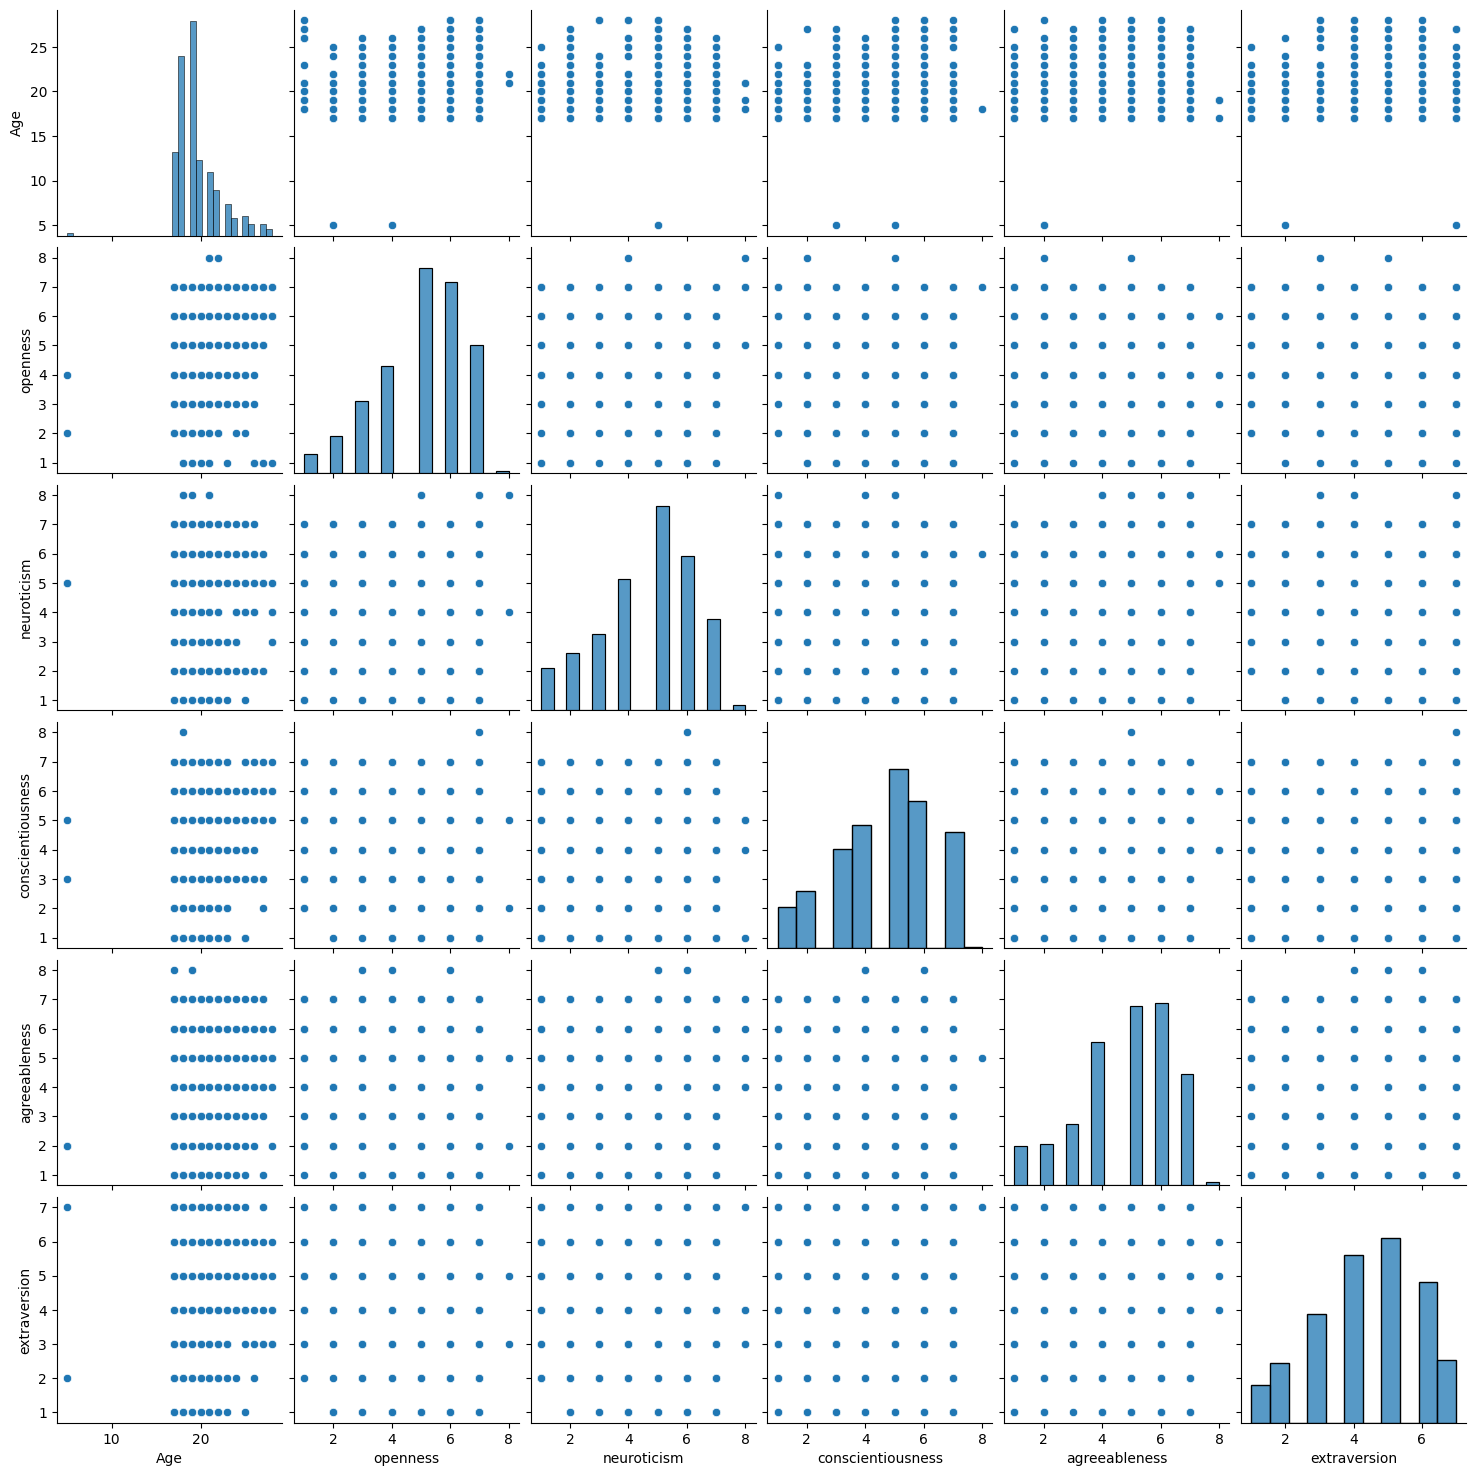

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset from the CSV file
df = pd.read_csv('train.csv')

# Display basic statistics of the dataset
print("Basic Statistics:")
print(df.describe())

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(df.head())

# Pairplot for numerical variables
sns.pairplot(df[['Age', 'openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']])
plt.show()



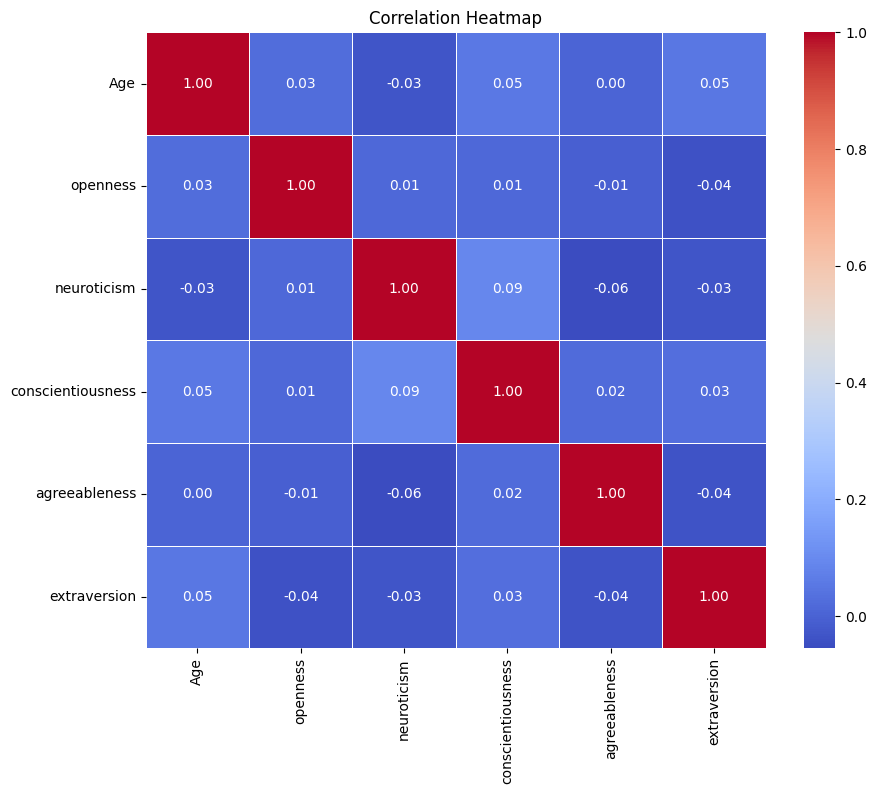

In [ ]:

# Correlation heatmap
correlation_matrix = df[['Age', 'openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()



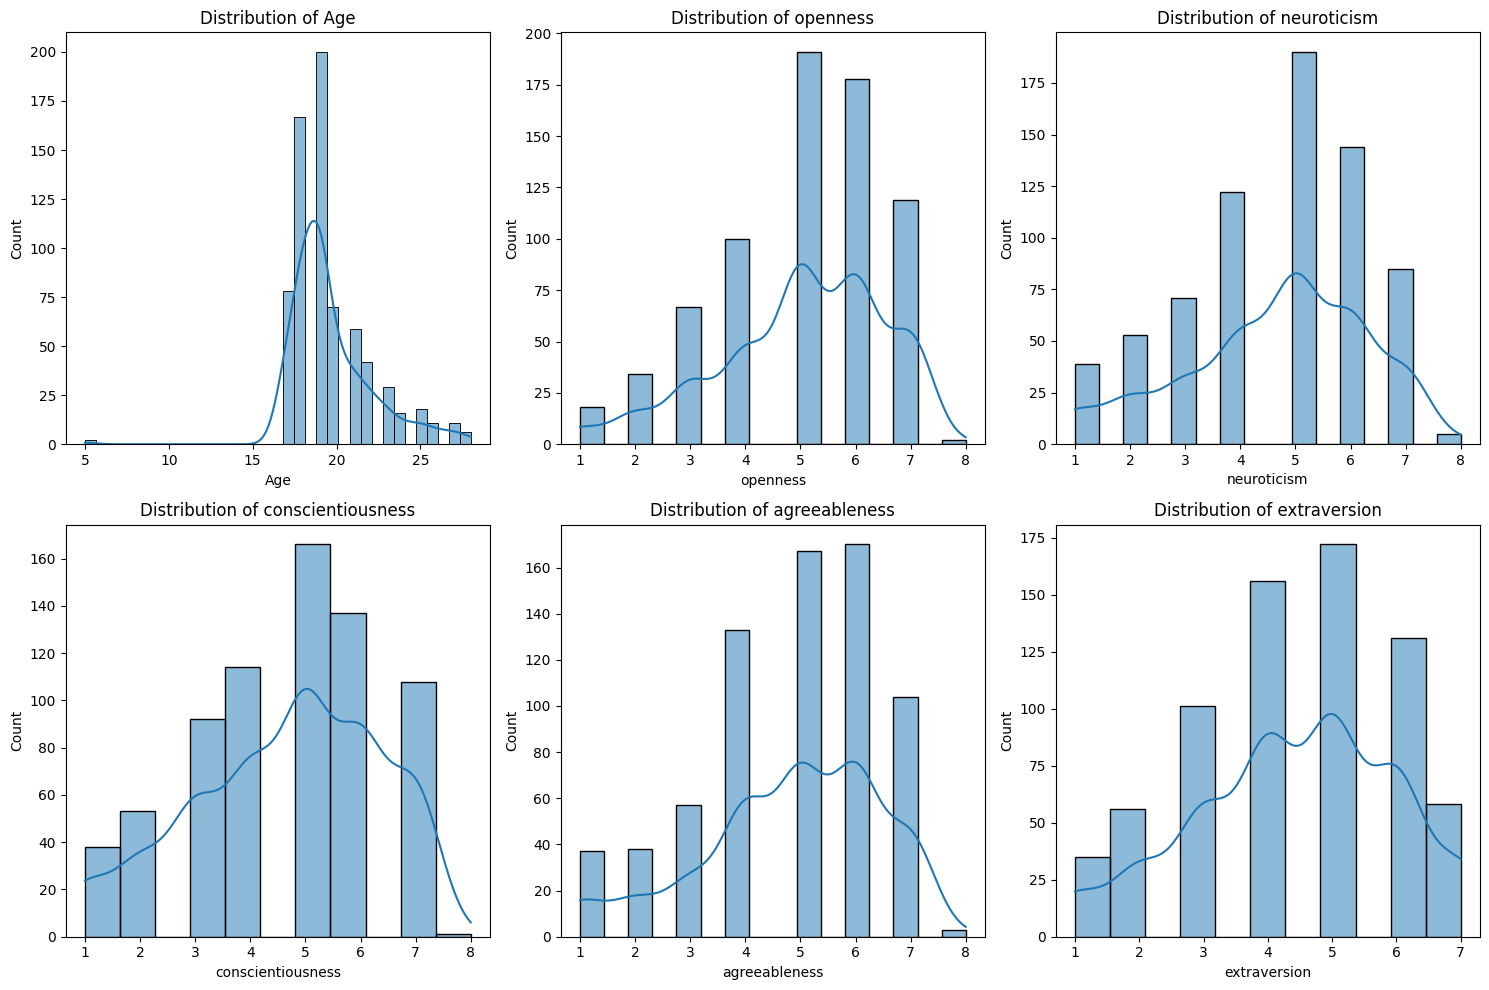

In [ ]:
# Distribution plots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()



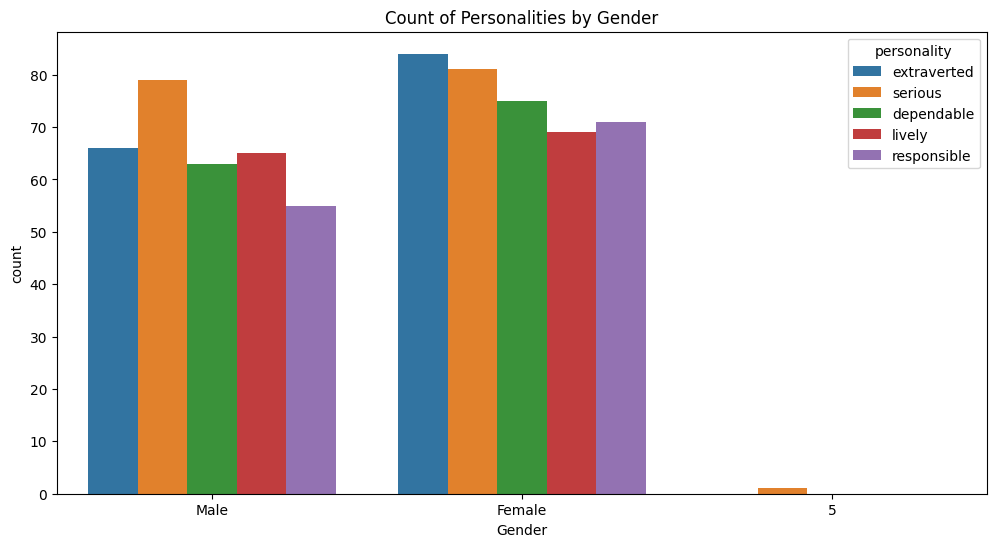

In [ ]:
# Countplot for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='personality', data=df)
plt.title('Count of Personalities by Gender')
plt.show()



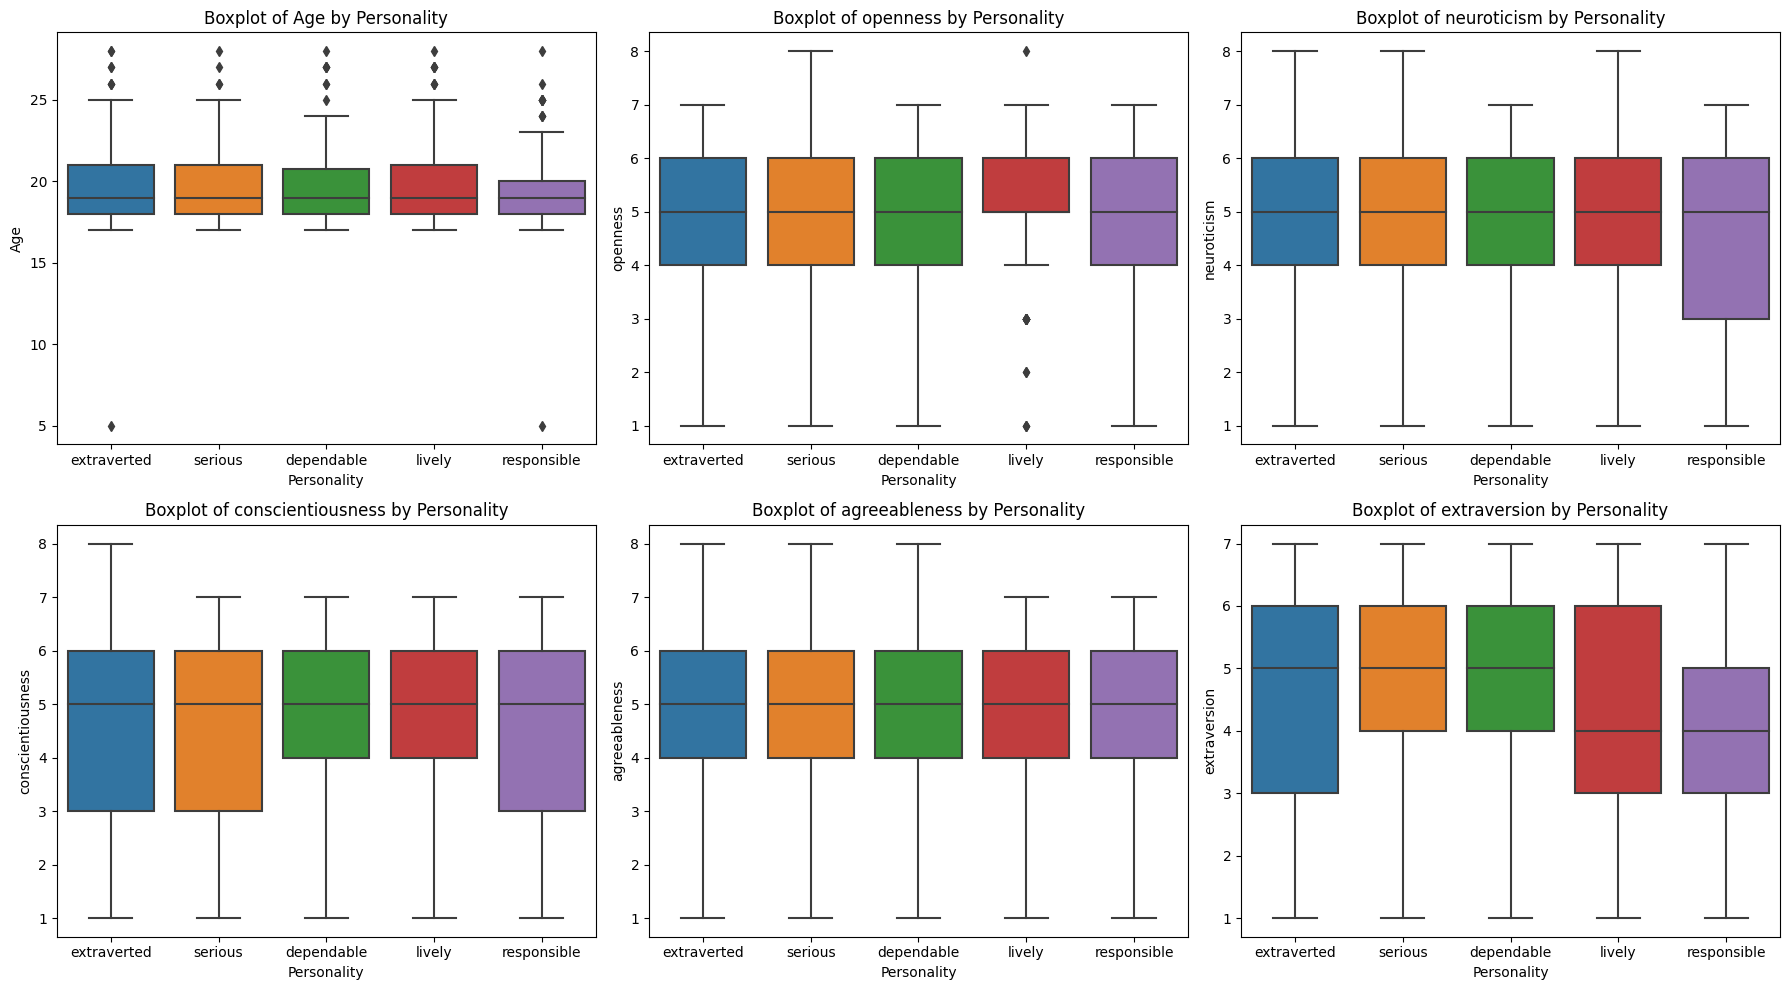

In [ ]:
# Boxplot for numerical variables by Personality
plt.figure(figsize=(18, 10))
for i, col in enumerate(['Age', 'openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='personality', y=col, data=df)
    plt.title(f'Boxplot of {col} by Personality')
    plt.xlabel('Personality')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Information gain

In [ ]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectPercentile, mutual_info_classif

def process_single_data(input_row):
    preprocessed_text = input_row['preprocessed_text']
    vectorizer = CountVectorizer()
    features = vectorizer.fit_transform([preprocessed_text])
    selector = SelectPercentile(mutual_info_classif, percentile=50)
    selected_features = selector.fit_transform(features, [preprocessed_text])
    feature_indices = selector.get_support(indices=True)
    selected_feature_names = vectorizer.get_feature_names_out()
    selected_feature_names = [selected_feature_names[idx] for idx in feature_indices]
    return selected_feature_names

def read_data_from_csv(input_filename):
    data = []
    with open(input_filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)
        for row in reader:
            row_dict = {}
            for i, val in enumerate(row):
                row_dict[header[i]] = val
            data.append(row_dict)
    return data

input_data = read_data_from_csv('covid_statements_preprocessed.csv')

for i in range(len(input_data)):
  selected_feature_names = process_single_data(input_data[i])


with open('information_gain.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Leader', 'information_gain_features'])
    for i in range(len(input_data)):
        row = input_data[i]
        selected_feature_names = process_single_data(row)
        writer.writerow([row['Leader'], ' '.join(selected_feature_names)])

Chi-Squared Test

In [ ]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

def process_single_data(input_row):
    preprocessed_text = input_row['preprocessed_text']
    vectorizer = CountVectorizer()
    features = vectorizer.fit_transform([preprocessed_text])
    selector = SelectKBest(chi2, k=4)
    selected_features = selector.fit_transform(features, [preprocessed_text])
    feature_indices = selector.get_support(indices=True)
    selected_feature_names = vectorizer.get_feature_names_out()
    return selected_feature_names

def read_data_from_csv(input_filename):
    data = []
    with open(input_filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)
        for row in reader:
            row_dict = {}
            for i, val in enumerate(row):
                row_dict[header[i]] = val
            data.append(row_dict)
    return data

input_data = read_data_from_csv('covid_statements_preprocessed.csv')
for i in range(len(input_data)):
  selected_feature_names = process_single_data(input_data[i])

with open('chi_squared.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Leader', 'chi_squared_features'])
    for i in range(len(input_data)):
        row = input_data[i]
        selected_feature_names = process_single_data(row)
        writer.writerow([row['Leader'], ' '.join(selected_feature_names)])


cfs

In [ ]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import GenericUnivariateSelect

def process_single_data(input_row):
    preprocessed_text = input_row['preprocessed_text']
    vectorizer = CountVectorizer(max_features=30)
    features = vectorizer.fit_transform([preprocessed_text])
    selector = SelectKBest(mutual_info_classif, k='all')
    selected_features = selector.fit_transform(features, [preprocessed_text])
    feature_indices = selector.get_support(indices=True)
    selected_feature_names = vectorizer.get_feature_names_out()
    return selected_feature_names

def read_data_from_csv(input_filename):
    data = []
    with open(input_filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)
        for row in reader:
            row_dict = {}
            for i, val in enumerate(row):
                row_dict[header[i]] = val
            data.append(row_dict)
    return data

input_data = read_data_from_csv('covid_statements_preprocessed.csv')

for i in range(len(input_data)):

  selected_feature_names = process_single_data(input_data[i])


with open('cfs.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Leader', 'cfs_features'])
    for i in range(len(input_data)):
        row = input_data[i]
        selected_feature_names = process_single_data(row)
        writer.writerow([row['Leader'], ' '.join(selected_feature_names)])


PCC

In [ ]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, f_classif

def process_single_data(input_row):
    preprocessed_text = input_row['preprocessed_text']
    vectorizer = CountVectorizer()
    features = vectorizer.fit_transform([preprocessed_text])
    selector = SelectKBest(f_classif, k=4)  # use PCC with k=50
    selected_features = selector.fit_transform(features, [preprocessed_text])
    feature_indices = selector.get_support(indices=True)
    selected_feature_names = vectorizer.get_feature_names_out()
    selected_feature_names = [selected_feature_names[idx] for idx in feature_indices]
    return selected_feature_names

def read_data_from_csv(input_filename):
    data = []
    with open(input_filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)
        for row in reader:
            row_dict = {}
            for i, val in enumerate(row):
                row_dict[header[i]] = val
            data.append(row_dict)
    return data

input_data = read_data_from_csv('covid_statements_preprocessed.csv')

with open('pcc_features.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Leader', 'pcc_features'])
    for i in range(len(input_data)):
        row = input_data[i]
        selected_feature_names = process_single_data(row)
        writer.writerow([row['Leader'], ' '.join(selected_feature_names)])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value

#OCEAN SCORES


In [ ]:
import csv
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def compute_ocean_scores(text):
    sentiment = sid.polarity_scores(text)
    openness_score = round(((sentiment['pos'] + 1 - sentiment['neg']) / 2) * 10,1)
    conscientiousness_score = round(((sentiment['pos'] + sentiment['neg']) / 2) * 10, 1)
    extraversion_score = round(((sentiment['pos'] + sentiment['neg'] + 1) / 2) * 10, 1)
    agreeableness_score = round(((sentiment['pos'] + 1 - sentiment['neg']) / 2) * 10, 1)
    neuroticism_score = round(((sentiment['neg'] + 1 - sentiment['pos']) / 2) * 10, 1)
    return {
        'openness': openness_score,
        'conscientiousness': conscientiousness_score,
        'extraversion': extraversion_score,
        'agreeableness': agreeableness_score,
        'neuroticism': neuroticism_score
    }


def read_data_from_csv(mypersonality_final):
    data = []
    with open(mypersonality_final, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            data.append(row[1])
    return data

def write_output_to_csv(mypersonality_final, output_file):
    with open(mypersonality_final, 'r') as input_csvfile, open(output_file, 'w', newline='') as output_csvfile:
        reader = csv.reader(input_csvfile)
        writer = csv.writer(output_csvfile)
        writer.writerow(next(reader) + ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism'])
        for row in reader:
            text = row[1]
            ocean_scores = compute_ocean_scores(text)
            writer.writerow(row + [ocean_scores['openness'], ocean_scores['conscientiousness'], ocean_scores['extraversion'], ocean_scores['agreeableness'], ocean_scores['neuroticism']])


dataset = read_data_from_csv('information_gain.csv')
print(len(dataset))
for i in range(len(dataset)):
  compute_ocean_scores(dataset[i])
write_output_to_csv('information_gain.csv', 'IG_OCEAN_Scores.csv')

24


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import csv
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def compute_ocean_scores(text):
    sentiment = sid.polarity_scores(text)
    openness_score = round(((sentiment['pos'] + 1 - sentiment['neg']) / 2) * 10,1)
    conscientiousness_score = round(((sentiment['pos'] + sentiment['neg']) / 2) * 10, 1)
    extraversion_score = round(((sentiment['pos'] + sentiment['neg'] + 1) / 2) * 10, 1)
    agreeableness_score = round(((sentiment['pos'] + 1 - sentiment['neg']) / 2) * 10, 1)
    neuroticism_score = round(((sentiment['neg'] + 1 - sentiment['pos']) / 2) * 10, 1)
    return {
        'openness': openness_score,
        'conscientiousness': conscientiousness_score,
        'extraversion': extraversion_score,
        'agreeableness': agreeableness_score,
        'neuroticism': neuroticism_score
    }


def read_data_from_csv(mypersonality_final):
    data = []
    with open(mypersonality_final, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            data.append(row[1])
    return data

def write_output_to_csv(mypersonality_final, output_file):
    with open(mypersonality_final, 'r') as input_csvfile, open(output_file, 'w', newline='') as output_csvfile:
        reader = csv.reader(input_csvfile)
        writer = csv.writer(output_csvfile)
        writer.writerow(next(reader) + ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism'])
        for row in reader:
            text = row[1]
            ocean_scores = compute_ocean_scores(text)
            writer.writerow(row + [ocean_scores['openness'], ocean_scores['conscientiousness'], ocean_scores['extraversion'], ocean_scores['agreeableness'], ocean_scores['neuroticism']])


dataset = read_data_from_csv('chi_squared.csv')
print(len(dataset))
for i in range(len(dataset)):
  compute_ocean_scores(dataset[i])
write_output_to_csv('chi_squared.csv', 'CS_OCEAN_Scores.csv')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


24


In [ ]:
import csv
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def compute_ocean_scores(text):
    sentiment = sid.polarity_scores(text)
    openness_score = round(((sentiment['pos'] + 1 - sentiment['neg']) / 2) * 10,1)
    conscientiousness_score = round(((sentiment['pos'] + sentiment['neg']) / 2) * 10, 1)
    extraversion_score = round(((sentiment['pos'] + sentiment['neg'] + 1) / 2) * 10, 1)
    agreeableness_score = round(((sentiment['pos'] + 1 - sentiment['neg']) / 2) * 10, 1)
    neuroticism_score = round(((sentiment['neg'] + 1 - sentiment['pos']) / 2) * 10, 1)
    return {
        'openness': openness_score,
        'conscientiousness': conscientiousness_score,
        'extraversion': extraversion_score,
        'agreeableness': agreeableness_score,
        'neuroticism': neuroticism_score
    }


def read_data_from_csv(mypersonality_final):
    data = []
    with open(mypersonality_final, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            data.append(row[1])
    return data

def write_output_to_csv(mypersonality_final, output_file):
    with open(mypersonality_final, 'r') as input_csvfile, open(output_file, 'w', newline='') as output_csvfile:
        reader = csv.reader(input_csvfile)
        writer = csv.writer(output_csvfile)
        writer.writerow(next(reader) + ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism'])
        for row in reader:
            text = row[1]
            ocean_scores = compute_ocean_scores(text)
            writer.writerow(row + [ocean_scores['openness'], ocean_scores['conscientiousness'], ocean_scores['extraversion'], ocean_scores['agreeableness'], ocean_scores['neuroticism']])


dataset = read_data_from_csv('cfs.csv')
print(len(dataset))
for i in range(len(dataset)):
  compute_ocean_scores(dataset[i])
write_output_to_csv('cfs.csv', 'CFS_OCEAN_Scores.csv')

24


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import csv
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def compute_ocean_scores(text):
    sentiment = sid.polarity_scores(text)
    openness_score = round(((sentiment['pos'] + 1 - sentiment['neg']) / 2) * 10,1)
    conscientiousness_score = round(((sentiment['pos'] + sentiment['neg']) / 2) * 10, 1)
    extraversion_score = round(((sentiment['pos'] + sentiment['neg'] + 1) / 2) * 10, 1)
    agreeableness_score = round(((sentiment['pos'] + 1 - sentiment['neg']) / 2) * 10, 1)
    neuroticism_score = round(((sentiment['neg'] + 1 - sentiment['pos']) / 2) * 10, 1)
    return {
        'openness': openness_score,
        'conscientiousness': conscientiousness_score,
        'extraversion': extraversion_score,
        'agreeableness': agreeableness_score,
        'neuroticism': neuroticism_score
    }


def read_data_from_csv(mypersonality_final):
    data = []
    with open(mypersonality_final, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            data.append(row[1])
    return data

def write_output_to_csv(mypersonality_final, output_file):
    with open(mypersonality_final, 'r') as input_csvfile, open(output_file, 'w', newline='') as output_csvfile:
        reader = csv.reader(input_csvfile)
        writer = csv.writer(output_csvfile)
        writer.writerow(next(reader) + ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism'])
        for row in reader:
            text = row[1]
            ocean_scores = compute_ocean_scores(text)
            writer.writerow(row + [ocean_scores['openness'], ocean_scores['conscientiousness'], ocean_scores['extraversion'], ocean_scores['agreeableness'], ocean_scores['neuroticism']])


dataset = read_data_from_csv('pcc_features.csv')
print(len(dataset))
for i in range(len(dataset)):
  compute_ocean_scores(dataset[i])
write_output_to_csv('pcc_features.csv', 'PCC_OCEAN_Scores.csv')

24


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#PERSONALITY prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('train.csv')
daata = pd.read_csv('IG_OCEAN_Scores.csv')
X_train = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y_train=data['personality']
y_test = daata[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
clf = SVC(kernel='poly')
clf.fit(X_train,y_train)

y_pred = clf.predict(y_test)

daata['personality'] = y_pred
daata.to_csv('IG_OCEAN_Scores.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('train.csv')
daata = pd.read_csv('CS_OCEAN_Scores.csv')
X_train = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y_train=data['personality']
y_test = daata[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
clf = SVC(kernel='rbf')
clf.fit(X_train,y_train)

y_pred = clf.predict(y_test)

daata['personality'] = y_pred
daata.to_csv('CS_OCEAN_Scores.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('train.csv')
daata = pd.read_csv('CFS_OCEAN_Scores.csv')
X_train = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y_train=data['personality']
y_test = daata[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
clf = SVC(kernel='poly')
clf.fit(X_train,y_train)

y_pred = clf.predict(y_test)

daata['personality'] = y_pred
daata.to_csv('CFS_OCEAN_Scores.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('train.csv')
daata = pd.read_csv('PCC_OCEAN_Scores.csv')
X_train = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y_train=data['personality']
y_test = daata[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
clf = SVC(kernel='poly')
clf.fit(X_train,y_train)

y_pred = clf.predict(y_test)

daata['personality'] = y_pred
daata.to_csv('PCC_OCEAN_Scores.csv', index=False)

#Classifiers

svc

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = pd.read_csv('CFS_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred)
accuracy1 = accuracy1 * 100
print("Accuracy: {:.2f}%".format(accuracy1))


Accuracy: 87.50%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = pd.read_csv('CS_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred)
accuracy1 = accuracy1 * 100
print("Accuracy: {:.2f}%".format(accuracy1))


Accuracy: 87.50%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = pd.read_csv('IG_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred)
accuracy1 = accuracy1 * 100
print("Accuracy: {:.2f}%".format(accuracy1))


Accuracy: 90.00%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = pd.read_csv('PCC_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred)
accuracy1 = accuracy1 * 100
print("Accuracy: {:.2f}%".format(accuracy1))


Accuracy: 83.33%


Decision Tree


In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

  # Load the dataset
data = pd.read_csv('CS_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.45,random_state=42)

# Train the decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Test the classifier on the test set
y_pred = clf.predict(X_test)

# Print the accuracy of the classifier
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1 = accuracy1 * 100
print("Accuracy: {:.2f}%".format(accuracy1))

Accuracy: 81.82%


In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

  # Load the dataset
data = pd.read_csv('CFS_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3,random_state=42)

# Train the decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Test the classifier on the test set
y_pred = clf.predict(X_test)

# Print the accuracy of the classifier
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1 = accuracy1 * 100
print("Accuracy: {:.2f}%".format(accuracy1))

Accuracy: 87.50%


In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

  # Load the dataset
data = pd.read_csv('PCC_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.45,random_state=42)

# Train the decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Test the classifier on the test set
y_pred = clf.predict(X_test)

# Print the accuracy of the classifier
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1 = accuracy1 * 100
print("Accuracy: {:.2f}%".format(accuracy1))

Accuracy: 81.82%


In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

  # Load the dataset
data = pd.read_csv('IG_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.62,random_state=42)

# Train the decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Test the classifier on the test set
y_pred = clf.predict(X_test)

# Print the accuracy of the classifier
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1 = accuracy1 * 100
print("Accuracy: {:.2f}%".format(accuracy1))

Accuracy: 93.33%


Naive Bayes

In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('CS_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.67, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ACC1 = accuracy_score(y_test, y_pred)
print("Naive Basis Accuracy CS: {:.2f}%".format(ACC1 * 100))

Naive Basis Accuracy CS: 76.47%


In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('CFS_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ACC1 = accuracy_score(y_test, y_pred)
print("Naive Basis Accuracy CFS: {:.2f}%".format(ACC1 * 100))

Naive Basis Accuracy CFS: 72.73%


In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('IG_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ACC1 = accuracy_score(y_test, y_pred)
print("Naive Basis Accuracy IG: {:.2f}%".format(ACC1 * 100))

Naive Basis Accuracy IG: 90.91%


In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('PCC_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.65, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ACC1 = accuracy_score(y_test, y_pred)
print("Naive Basis Accuracy PCC: {:.2f}%".format(ACC1 * 100))

Naive Basis Accuracy PCC: 93.75%


Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('CS_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ACC1 = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(ACC1 * 100))

Random Forest Accuracy: 81.82%


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('PCC_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ACC1 = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(ACC1 * 100))

Random Forest Accuracy: 85.71%


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('CFS_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ACC1 = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(ACC1 * 100))

Random Forest Accuracy: 90.91%


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('IG_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ACC1 = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(ACC1 * 100))

Random Forest Accuracy: 92.86%
